# NonParametric

Assumptions can greatly simplify the learning process, but can also limit what can be learned. Algorithms that simplify the function to a known form are called parametric machine learning algorithms.

A learning model that summarizes data with a set of parameters of fixed size (independent of the number of training examples) is called a parametric model. No matter how much data you throw at a parametric model, it won’t change its mind about how many parameters it needs.

Nonparametric methods are good when you have a lot of data and no prior knowledge, and when you don’t want to worry too much about choosing just the right features.

https://machinelearningmastery.com/parametric-and-nonparametric-machine-learning-algorithms/


In [1]:
import sklearn as skl
import matplotlib as mpl

print("Scikit Learn version: "+ skl.__version__)
print("Matplotlib version: "+ mpl.__version__)

Scikit Learn version: 1.0.2
Matplotlib version: 3.5.1


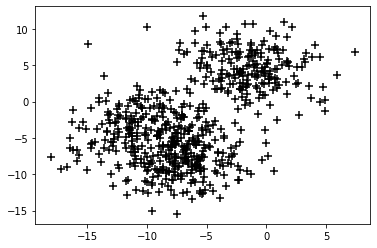

In [5]:
import matplotlib.pyplot as plt

from sklearn import datasets

# https://scikit-learn.org/stable/datasets/sample_generators.html#sample-generators
x, y = datasets.make_blobs(n_samples=600, n_features=2, cluster_std=3, random_state=1)

plt.scatter(x[:,0], x[:,1], c='k', marker='+', s=50)
plt.show()

In [6]:
import mlxtend as mlx

print("ML Extend version: "+ mlx.__version__)

ML Extend version: 0.19.0


## K Nearest Neighbors

<AxesSubplot:>

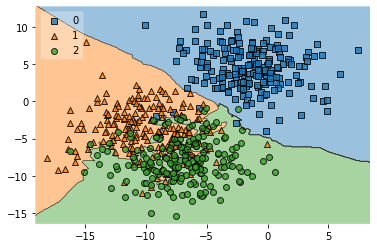

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='ball_tree') #n_neighbors = 5 algorithm='auto'

knn.fit(x, y)

from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots()

plot_decision_regions(x, y, clf=knn, legend=2, ax=ax)

<AxesSubplot:>

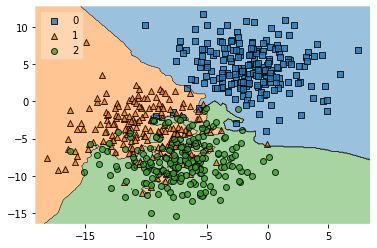

In [13]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')

knn.fit(x, y)

fig, ax = plt.subplots()

plot_decision_regions(x, y, clf=knn, legend=2, ax=ax)

<AxesSubplot:>

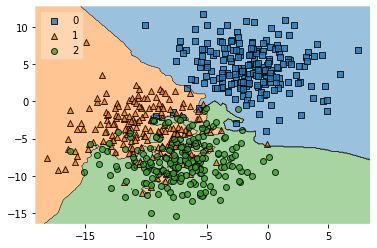

In [14]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')

knn.fit(x, y)

fig, ax = plt.subplots()

plot_decision_regions(x, y, clf=knn, legend=2, ax=ax)

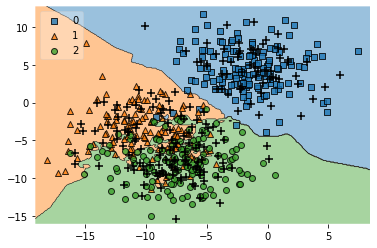

In [16]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, stratify=y)

knn = KNeighborsClassifier()

knn.fit(xTrain, yTrain)

fig, ax = plt.subplots()

plot_decision_regions(xTrain, yTrain, clf=knn, legend=2, ax=ax)
plt.scatter(xTest[:,0], xTest[:,1], c='k', marker='+', s=50)

Accuracy:  0.8666666666666667
F1:  0.8653703260875906
Loss:  1.0122984442424618
Cros validation:  [0.88333333 0.78333333 0.875      0.85833333 0.825     ]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.88      0.72      0.79        60
           2       0.76      0.88      0.82        60

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



/Users/joseluis/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


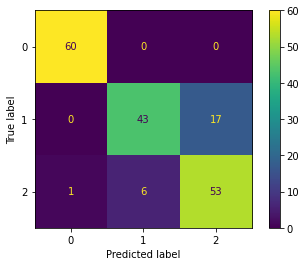

In [18]:
from sklearn import metrics
from sklearn import model_selection

knnPred = knn.predict(xTest) #Shape => (200,1) [2]
knnProb = knn.predict_proba(xTest) #Shape => (200, 3) [0.1, 0.4, 0.5]

print("Accuracy: ", metrics.balanced_accuracy_score(yTest, knnPred))
print("F1: ", metrics.f1_score(yTest, knnPred, average='weighted'))
print("Loss: ", metrics.log_loss(yTest, knnProb))
print("Cross validation: ", model_selection.cross_val_score(knn, x, y))

print(metrics.classification_report(yTest, knnPred))

metrics.plot_confusion_matrix(knn, xTest, yTest)

<img src="BiasVariance.png">

## Prototype kMeans

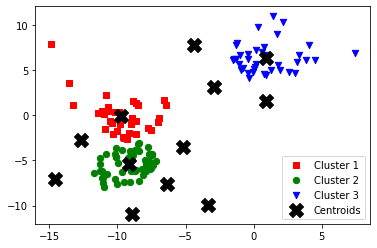

In [26]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(xTrain)

plt.scatter(xTrain[y_km==0, 0], xTrain[y_km==0, 1], s=40, c='r', marker='s', label='Cluster 1')
plt.scatter(xTrain[y_km==1, 0], xTrain[y_km==1, 1], s=40, c='g', marker='o', label='Cluster 2')
plt.scatter(xTrain[y_km==2, 0], xTrain[y_km==2, 1], s=40, c='b', marker='v', label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='k', marker='X', label='Centroids')

plt.legend(scatterpoints=1)

In [21]:
centroids = knn.predict(km.cluster_centers_)

print(km.cluster_centers_, centroids)

[[ -1.51256222   4.59997373]
 [-10.93400351  -3.23859039]
 [ -6.58106409  -8.25277258]] [0 1 2]


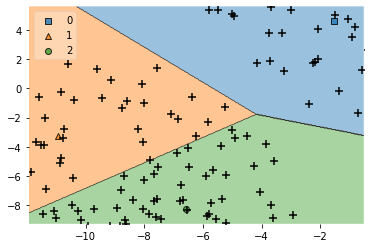

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(km.cluster_centers_, centroids)

fig, ax = plt.subplots()

plot_decision_regions(km.cluster_centers_, centroids, clf=knn, legend=2, ax=ax)
plt.scatter(xTest[:,0], xTest[:,1], c='k', marker='+', s=50)

Accuracy:  0.8777777777777778
F1:  0.8762690627601418
Loss:  4.221406003822417
Cross validation:  [0.8        0.76666667 0.8        0.78333333 0.84166667]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.91      0.72      0.80        60
           2       0.76      0.92      0.83        60

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180



/Users/joseluis/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


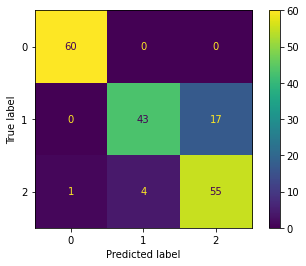

In [25]:
knnPred = knn.predict(xTest) #Shape => (200,1) [2]
knnProb = knn.predict_proba(xTest) #Shape => (200, 3) [0.1, 0.4, 0.5]

print("Accuracy: ", metrics.balanced_accuracy_score(yTest, knnPred))
print("F1: ", metrics.f1_score(yTest, knnPred, average='weighted'))
print("Loss: ", metrics.log_loss(yTest, knnProb))
print("Cross validation: ", model_selection.cross_val_score(knn, x, y))

print(metrics.classification_report(yTest, knnPred))

metrics.plot_confusion_matrix(knn, xTest, yTest)